In [1]:
import wave_timing.utils as wtu
import wave_timing.calc as wtc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
start_date = '2021-01-19'
end_date = '2021-01-20'

In [3]:
data = wtu.get_data(start_date, end_date)
dv1, dv2, dv3, dv4, __ = data.get_vac_data()
mag_data = data.get_mag_data()
sw_data = data.get_sw_data()

07-Aug-24 18:00:03: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/dfb_dbm_vac/2021/
07-Aug-24 18:00:03: File is current: ./../data/fields/l2/dfb_dbm_vac/2021/psp_fld_l2_dfb_dbm_vac_2021011900_v02.cdf
07-Aug-24 18:00:04: File is current: ./../data/fields/l2/dfb_dbm_vac/2021/psp_fld_l2_dfb_dbm_vac_2021011906_v02.cdf
07-Aug-24 18:00:04: File is current: ./../data/fields/l2/dfb_dbm_vac/2021/psp_fld_l2_dfb_dbm_vac_2021011912_v02.cdf
07-Aug-24 18:00:04: No links matching pattern psp_fld_l2_dfb_dbm_vac_2021011918_v??.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/dfb_dbm_vac/2021/
07-Aug-24 18:00:17: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_sc_4_per_cycle/2021/
07-Aug-24 18:00:17: File is current: ./../data/fields/l2/mag_sc_4_per_cycle/2021/psp_fld_l2_mag_sc_4_sa_per_cyc_20210119_v02.cdf
07-Aug-24 18:00:17: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_sc_4_per_c

Using LEVEL=L3


07-Aug-24 18:00:18: File is current: ./../data/sweap/spi/l3/spi_sf00_l3_mom/2021/psp_swp_spi_sf00_l3_mom_20210119_v04.cdf


In [4]:
waveform_times = dv1.columns
start_date = waveform_times[0]
time = np.array(dv1.index)
dv1 = dv1[start_date].to_numpy()
dv2 = dv2[start_date].to_numpy()
dv3 = dv3[start_date].to_numpy()
dv4 = dv4[start_date].to_numpy()

In [5]:
mag_date = mag_data.index
Bx = mag_data['Bx']
By = mag_data['By']
Bz = mag_data['Bz']
B_mag = mag_data['|B|']
print(mag_data[['Bx', 'By', 'Bz']])

                                      Bx         By          Bz
2021-01-19 00:00:00.081084013   4.169172 -16.953241  191.638168
2021-01-19 00:00:00.299537897   0.430030 -19.610962  191.309860
2021-01-19 00:00:00.517990827  -2.789330 -15.555620  191.358780
2021-01-19 00:00:00.736443996  -3.355412 -21.395241  191.336029
2021-01-19 00:00:00.954896927   1.515569 -19.730083  191.251770
...                                  ...        ...         ...
2021-01-19 23:59:59.063040972 -10.385036  15.322059  -64.656982
2021-01-19 23:59:59.281493902 -10.524751  14.731573  -64.418526
2021-01-19 23:59:59.499948025 -10.243676  14.844669  -64.658821
2021-01-19 23:59:59.718400955  -9.902087  14.107254  -64.860870
2021-01-19 23:59:59.936854124 -10.085871  13.411308  -65.335724

[395507 rows x 3 columns]


In [6]:
sw_date = sw_data.index
Vx = sw_data.Vx
Vy = sw_data.Vy
Vz = sw_data.Vz
V_mag = sw_data['|V|']

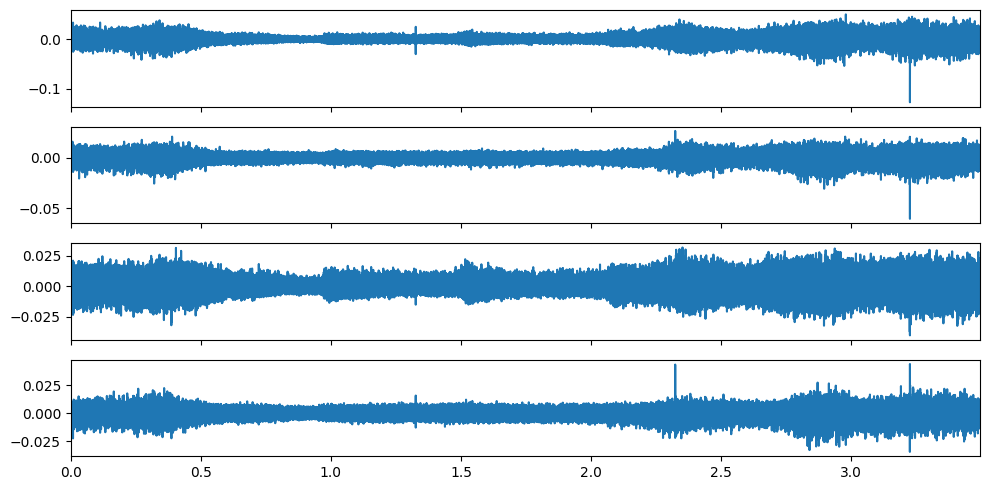

In [7]:
fig, ax = plt.subplots(4, sharex=True, figsize=(10, 5))
ax[0].plot(time, dv1)
ax[1].plot(time, dv2)
ax[2].plot(time, dv3)
ax[3].plot(time, dv4)
ax[0].set_xlim(time.min(), time.max())
plt.tight_layout()

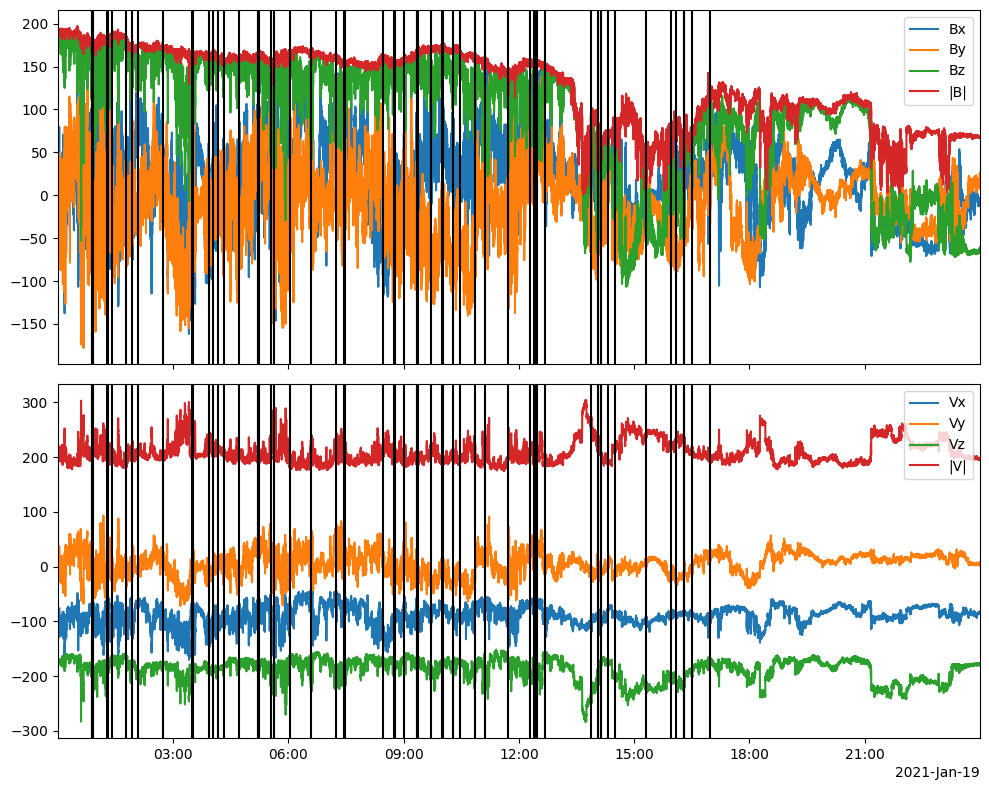

In [8]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 8))
ax[0].plot(mag_date, Bx, label='Bx')
ax[0].plot(mag_date, By, label='By')
ax[0].plot(mag_date, Bz, label='Bz')
ax[0].plot(mag_date, B_mag, label='|B|')

ax[1].plot(sw_date, Vx, label='Vx')
ax[1].plot(sw_date, Vy, label='Vy')
ax[1].plot(sw_date, Vz, label='Vz')
ax[1].plot(sw_date, V_mag, label='|V|')

for times in waveform_times:
    ax[0].axvline(times, c='k')
    ax[1].axvline(times, c='k')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[0].set_xlim(np.min(mag_date), np.max(mag_date))
plt.tight_layout()

In [9]:
taps = 601
cutoff = [100, 900]
fs = len(time) / time[-1]
filters = wtu.FIRBandPass(taps, cutoff, fs)
dv1 = wtu.wave_normalization(dv1)
# dv1 = dv1.to_numpy()
dv1_filt = filters.filter(dv1)
dv1_filt = wtu.wave_normalization(dv1_filt)

In [10]:
d_dv1 = wtc.derivitive(dv1, time)
d_dv1 = wtu.wave_normalization(filters.filter(d_dv1))
dv1 = wtu.wave_normalization(dv1)
d_dv1_filt = wtc.derivitive(dv1_filt, time)
d_dv1_filt = wtu.wave_normalization(d_dv1_filt)
dv1_filt = wtu.wave_normalization(dv1_filt)

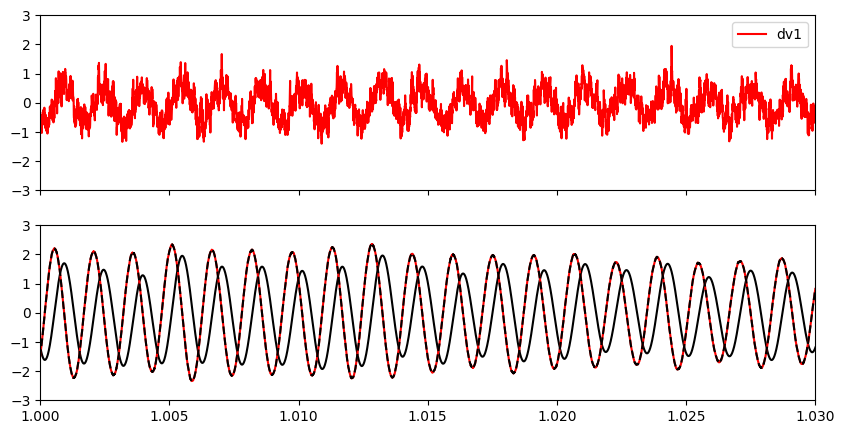

In [12]:
fig, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].plot(time, dv1, 'r', label='dv1')
ax[0].plot(time, dv1_filt, 'k', label='dv1 filt')

ax[1].plot(time, d_dv1, 'r', label='dv1 deriv')
ax[1].plot(time, d_dv1_filt, '--k', label='dv1 filt diriv')
ax[0].set_xlim(1, 1.03)
ax[0].set_ylim(-3, 3)
ax[0].legend()